In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from my_functions import filter_columns_from_data_source

pd.set_option('display.max_columns', None)
# read the data from https://pslcdatashop.web.cmu.edu/DatasetInfo?datasetId=579 
# 
df_data=pd.read_csv("survey_results_public.csv")
df_schema=pd.read_csv("survey_results_schema.csv")

df_data.head()




,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [2]:
df_schema.columns
# The first step is to get an overview of the available data and select which should be selected for the detailed questions.
 
my_selected_columns=[ 
    "MainBranch", # classification of developer (profession-hobby)
    "Age", # categorized under 18,  18-24, 25-34 35-44 45-54 55-64 65 and above no comment
    "Employment", # categorized 
    "EdLevel", # categorized primary, secondary, college / university without degree, Associated ,Bachelor , Master , professional degree , else  / 
    "LearnCode", 
    "YearsCode",
    "YearsCodePro",
    "DevType",
    "OrgSize",
    "AISearchDevHaveWorkedWith", # list of tool selection
    "AISearchDevWantToWorkWith", # list of tool selection
    "AISearchDevAdmired", # list of tool selection
    "AISelect", # categrical use AI in current workflow Yes, NO, but I plan to soon No, and I don not plan to  
    "AISent", # categorical from favourablevery  to indifferent to very unfavourable and unsure
    "AIAcc",  # Likert like Highly , somewhat neiter trust nor distrust somewhat distrust, highly distrust
    "AIComplex",
    "AIThreat", # thread to job, yes, no I am not sure
    "AIEthics",
    "AIChallenges", 
    "ConvertedCompYearly", # numerical 
    "JobSat"  # numerical categorized 
]

my_excluded=[
    "JobSatPoints_1",
    "JobSatPoints_4",
    "JobSatPoints_5",
    "JobSatPoints_6",
    "JobSatPoints_7",
    "JobSatPoints_8",
    "JobSatPoints_9",
    "JobSatPoints_10",
    "JobSatPoints_11",
    "TBranch",
    "ICorPM",
    "WorkExp",
    "AIBen", 
    "Knowledge_1",
    "Knowledge_2",
    "Knowledge_3",
    "Knowledge_4",
    "Knowledge_5",
    "Knowledge_6",
    "Knowledge_7",
    "Knowledge_8",
    "Knowledge_9",
    "Frequency_1",
    "Frequency_2",
    "Frequency_3",
    "TimeSearching",
    "TimeAnswering",
    "Frustration",
    "ProfessionalTech",
    "ProfessionalCloud",
    "ProfessionalQuestion",
    "Industry",
    "ResponseId",
    "LearnCodeOnline",
    "TechDoc",
    "PurchaseInfluence",
    "BuyNewTool",
    "BuildvsBuy",
    "TechEndorse",
    "Country",
    "Currency",
    "CompTotal",    
    "Check",
    "RemoteWork",
    "AIToolCurrently Using",
    "AIToolInterested in Using",
    "AIToolNot interested in Using",
    "AINextMuch more integrated",
    "AINextNo change",
    "AINextMore integrated",
    "AINextLess integrated",
    "AINextMuch less integrated",
    "CodingActivities",
    "LanguageHaveWorkedWith",
    "LanguageWantToWorkWith",
    "LanguageAdmired",
    "DatabaseHaveWorkedWith",
    "DatabaseWantToWorkWith",
    "DatabaseAdmired",
    "PlatformHaveWorkedWith",
    "PlatformWantToWorkWith",
    "PlatformAdmired",
    "WebframeHaveWorkedWith",
    "WebframeWantToWorkWith",
    "WebframeAdmired",
    "EmbeddedHaveWorkedWith",
    "EmbeddedWantToWorkWith",
    "EmbeddedAdmired",
    "MiscTechHaveWorkedWith",
    "MiscTechWantToWorkWith",
    "MiscTechAdmired",
    "ToolsTechHaveWorkedWith",
    "ToolsTechWantToWorkWith",
    "ToolsTechAdmired",
    "NEWCollabToolsHaveWorkedWith",
    "NEWCollabToolsWantToWorkWith",
    "NEWCollabToolsAdmired",
    "OpSysPersonal use",
    "OpSysProfessional use",
    "OfficeStackAsyncHaveWorkedWith",
    "OfficeStackAsyncWantToWorkWith",
    "OfficeStackAsyncAdmired",
    "OfficeStackSyncHaveWorkedWith",
    "OfficeStackSyncWantToWorkWith",
    "OfficeStackSyncAdmired",
    "NEWSOSites",
    "SOVisitFreq",
    "SOAccount",
    "SOPartFreq",
    "SOHow",
    "SOComm",
    "SurveyLength",
    "SurveyEase"
]
# check that no typo occured and that both selection lists add up to the initial column list
is_len_equal=len(set(my_selected_columns+my_excluded)) ==len(df_data.columns)
print(f"Two sets and initial columns have same length: {is_len_equal}")
is_equal=set(my_selected_columns+my_excluded)==set(df_data.columns)
print(f"Two selection sets are identical: {is_equal}")


Two sets and initial columns have same length: True
Two selection sets are identical: True


In [3]:
# Fist qeustion is on the used and future used AI search and development tools
# In order to check whether people are not using and wamt to use, the response ID will be considere.

my_selected_columns=[ 
    "ResponseId",
    "AISearchDevHaveWorkedWith",
    "AISearchDevWantToWorkWith",
]

df_filtered=filter_columns_from_data_source(my_selected_columns,"survey_results_public.csv")
df_filtered.info()
df_filtered.describe()

df_clean=df_filtered[~df_filtered.drop(columns="ResponseId").isna().all(axis=1)]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ResponseId                 65437 non-null  int64 
 1   AISearchDevHaveWorkedWith  44453 non-null  object
 2   AISearchDevWantToWorkWith  36701 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 44453 entries, 5 to 65421
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ResponseId                 44453 non-null  int64 
 1   AISearchDevHaveWorkedWith  44453 non-null  object
 2   AISearchDevWantToWorkWith  36701 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [4]:
df_clean_ai_search_tool=df_clean

df_clean_ai_search_tool.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44453 entries, 5 to 65421
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ResponseId                 44453 non-null  int64 
 1   AISearchDevHaveWorkedWith  44453 non-null  object
 2   AISearchDevWantToWorkWith  36701 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [5]:
# overview of used and future used and admired AI tools

df_current=df_clean_ai_search_tool[["ResponseId",
    "AISearchDevHaveWorkedWith"]].assign(AISearchDevHaveWorkedWith=df_clean_ai_search_tool["AISearchDevHaveWorkedWith"].str.split(";")).explode("AISearchDevHaveWorkedWith")
df_planned=df_clean_ai_search_tool[["ResponseId",
    "AISearchDevWantToWorkWith"]].assign(AISearchDevWantToWorkWith=df_clean_ai_search_tool["AISearchDevWantToWorkWith"].str.split(";")).explode("AISearchDevWantToWorkWith")




In [6]:
# determine the percentage of currently used and planned to use ai search and development tools
total_developers=df_clean_ai_search_tool.shape[0]
print(f"Number of developer in survey selection:{total_developers}")
current_counts=df_current["AISearchDevHaveWorkedWith"].value_counts() 
planned_counts=df_planned["AISearchDevWantToWorkWith"].value_counts() 

combined_counts=pd.DataFrame({"Currently used" : current_counts, "Planned use" : planned_counts }).fillna(0)
combined_counts_percentage=combined_counts.div(total_developers, axis=0) * 100
                      

Number of developer in survey selection:44453


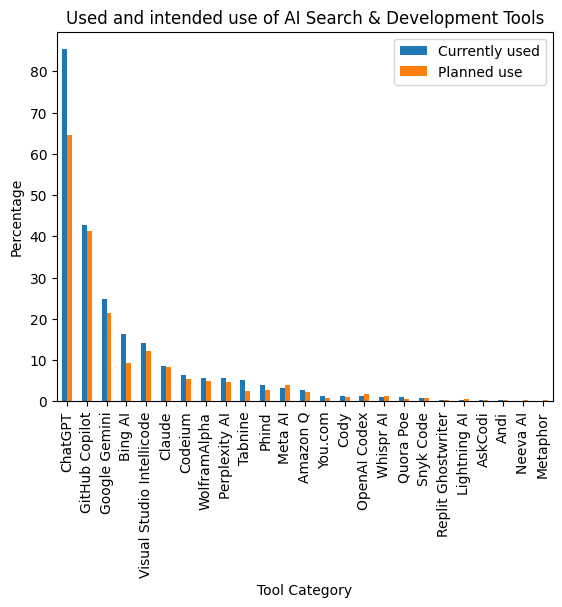

In [7]:
combined_counts_percentage_sorted=combined_counts_percentage.sort_values(by="Currently used", ascending=False)
combined_counts_percentage_sorted.plot(kind="bar")

# Add labels and title
plt.xlabel("Tool Category")
plt.ylabel("Percentage")
plt.title("Used and intended use of AI Search & Development Tools")

# Show the plot
plt.show()


In [8]:
df_clean_ai_search_tool.head()


,ResponseId,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith
5,6,ChatGPT;GitHub Copilot;OpenAI Codex,ChatGPT;GitHub Copilot
7,8,ChatGPT,ChatGPT
9,10,ChatGPT;Google Gemini,ChatGPT;Google Gemini
10,11,ChatGPT;GitHub Copilot;Google Gemini;Meta AI;V...,GitHub Copilot;Google Gemini;Visual Studio Int...
13,14,ChatGPT,ChatGPT
